In [1]:
import os

In [3]:
# Set the environment variable to avoid memory leak warning
os.environ['OMP_NUM_THREADS'] = '1'

In [4]:
# Load the dataset
import pandas as pd

In [5]:
df=pd.read_csv('Mall_Customers.csv')

In [6]:
#show dataset info
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
# Select relevant features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [8]:
from sklearn.cluster import KMeans

In [9]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

In [11]:
import matplotlib.pyplot as plt


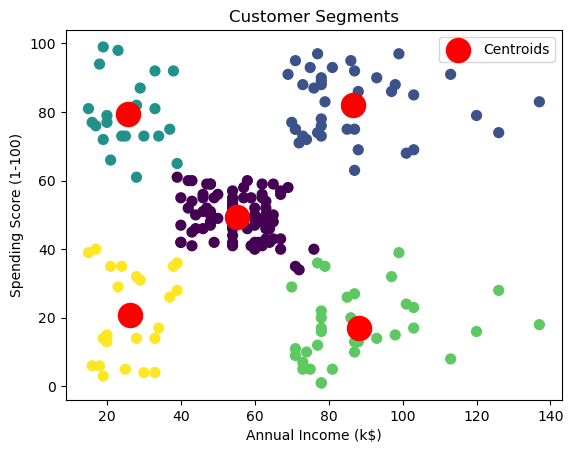

In [12]:
# Visualize the clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.legend()
plt.show()